In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("Iris.csv")

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.shape

(150, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [13]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns=["Species","Id"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = [] #within cluster sum of square
cluster_range = range(1,11)
for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(iris_df)
    wcss.append(model.inertia_)

In [16]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.32042673992674,
 30.489160868519573,
 27.839591136933254,
 26.175990717744593]

In [17]:
import matplotlib.pyplot as plt

<ipython-input-21-23d90f7787b2>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(cluster_range,wcss,"go--",color = "blue")


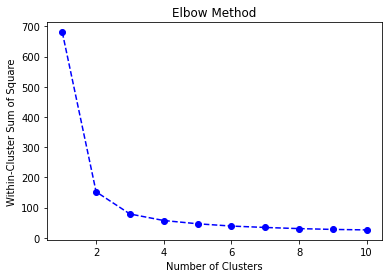

In [21]:
plt.plot(cluster_range,wcss,"go--",color = "blue")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Square");

In [19]:
from sklearn.cluster import KMeans

model1 = KMeans(n_clusters=3)
preds = model1.fit(iris_df)

In [23]:
model2 = KMeans(n_clusters=3,init='k-means++',random_state=0)
preds2 = model2.fit_predict(x)
print(preds2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


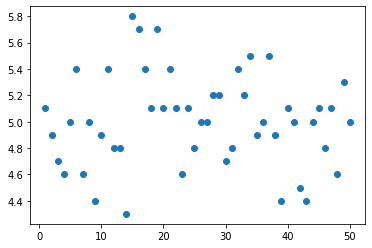

In [24]:
x = df.iloc[:,[0,1]].values


plt.scatter(x[preds2 == 0,0],x[preds2 == 0,1])

In [25]:
kmean = KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmean = kmean.fit_predict(x)
print(y_kmean)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


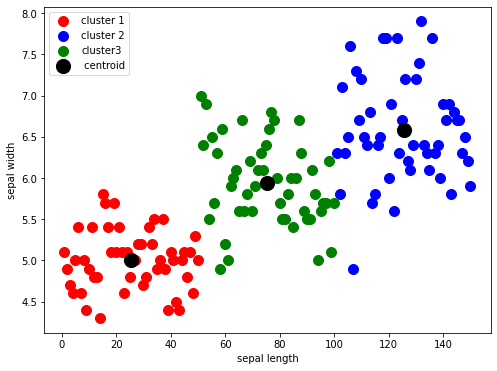

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1],s=100, c='red', label='cluster 1')
plt.scatter (x[y_kmean==1,0],x[y_kmean==1,1], s=100, c= 'blue' ,label='cluster 2')
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1],s=100,c='green',label='cluster3')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#plotting the centroid of the clusters
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=200, c='black' , label=' centroid')
plt.legend()